# **DETECCIÓN DE HELADAS NEGRAS EN EL PARAMO DE BERLÍN**

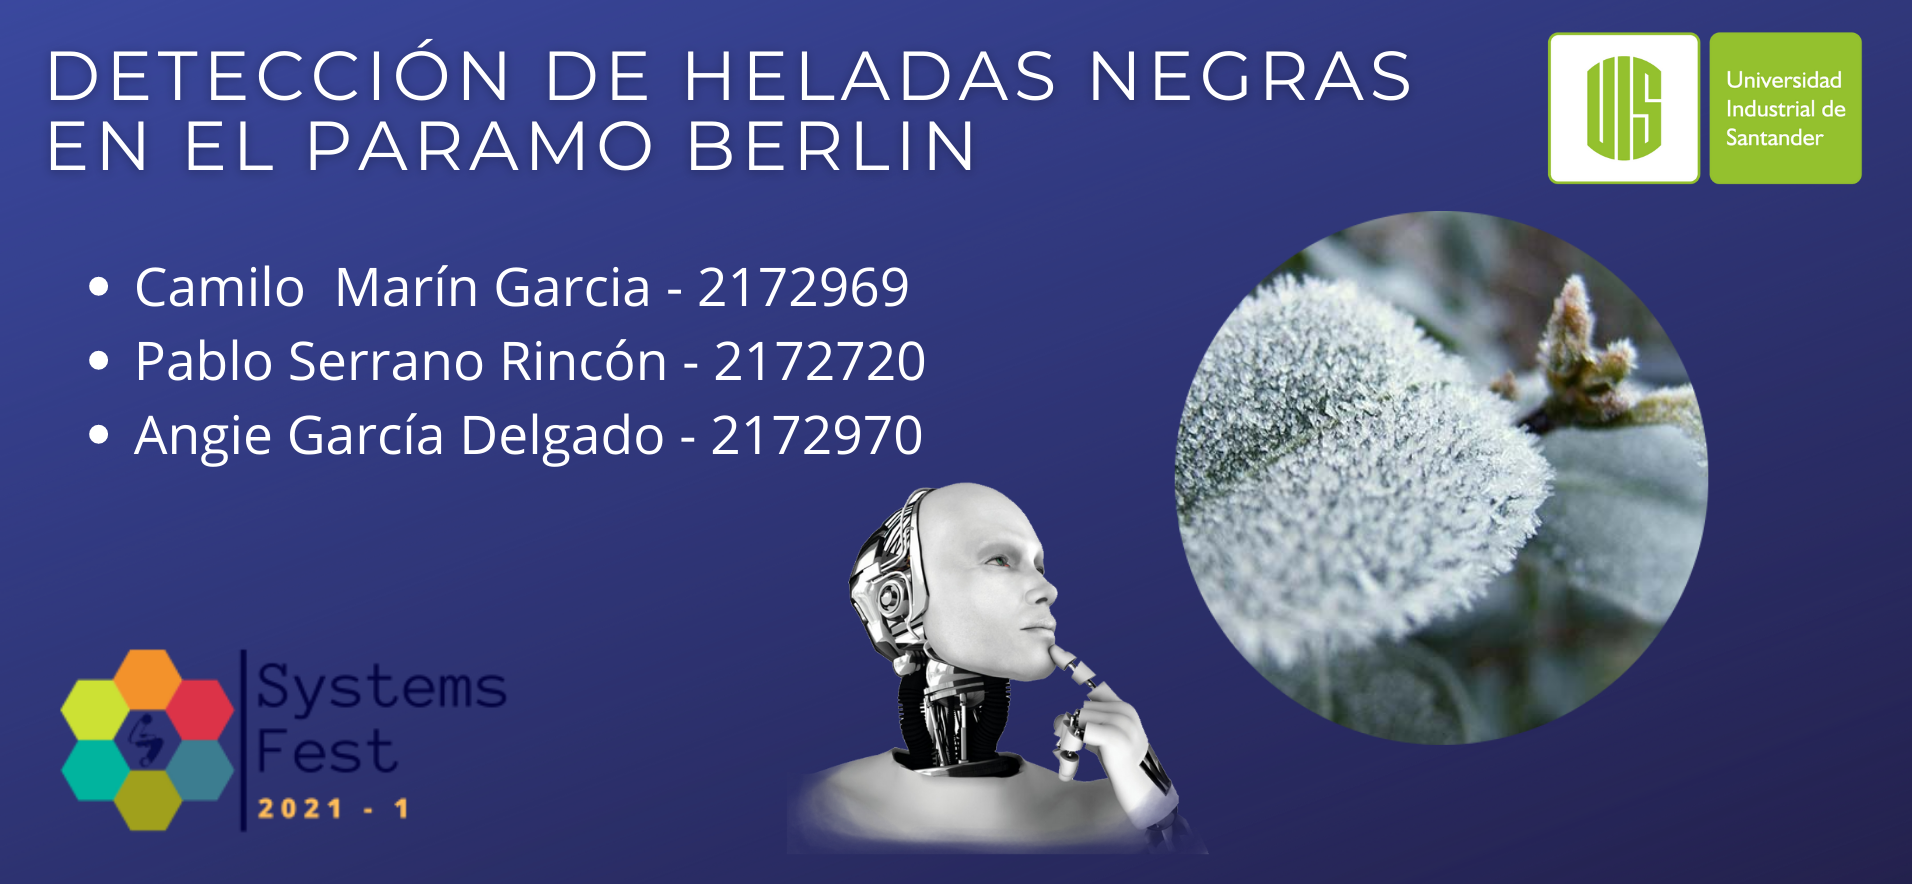

# **1. El problema a resolver**
> Detectar la presencia de heladas negras, las cuales son un derivado de las heladas por radiación que a diferencia de las heladas blancas, se producen cuando la temperatura del aire no alcanza la temperatura de rocío y la humedad relativa del medio es demasiado baja. Es decir, cuando la humedad relativa es demasiado baja, significa que el aire tiene poco vapor de agua, lo que da como resultado aire seco que no se condensa en gotas y escarcha, permitiendo que el frio ataque directamente la estructura interna de la planta e incluso causando la muerte de esta.


 # **2. El set de datos**

> Como no se encuentran datos de las condiciones de heladas en berlin, se construyó el dataset con variables recolectadas del sistema de consulta de datos del IDEAM en la estación meteorológica de Berlín, tona.

Mediante tecnicas de minería de datos, se construyó un dataset con variables importantes en el proceso de formación de heladas como lo son:
- Temperatura mínima diaria
- Temperatura Máxima diaria
- Temperatura mínima del aire
- Humedad relativa mínima diaria
- Humedad relativa máxima diaria
- Nivel de nubosidad
- Temperatura de rocío mínima.
- Fecha


*****
El dataset contiene 1963 datos clasificados entre heladas negras, heladas blancas y datos normales. De esta cantidad de datos tan solo 153 corresponden al fenómeno de las heladas, por ende nos encontramos frente un problema de clasificación desbalanceado.



# **3. LSTM multivariadas para predicción de series de tiempo**
> Para detectar heladas negras se necesita la información de las diferentes características meteorológicas mencionadas anteriormente, la implementación de una LSTM multivariada permite la predicción de estas variables a partir de los datos ya recolectados.

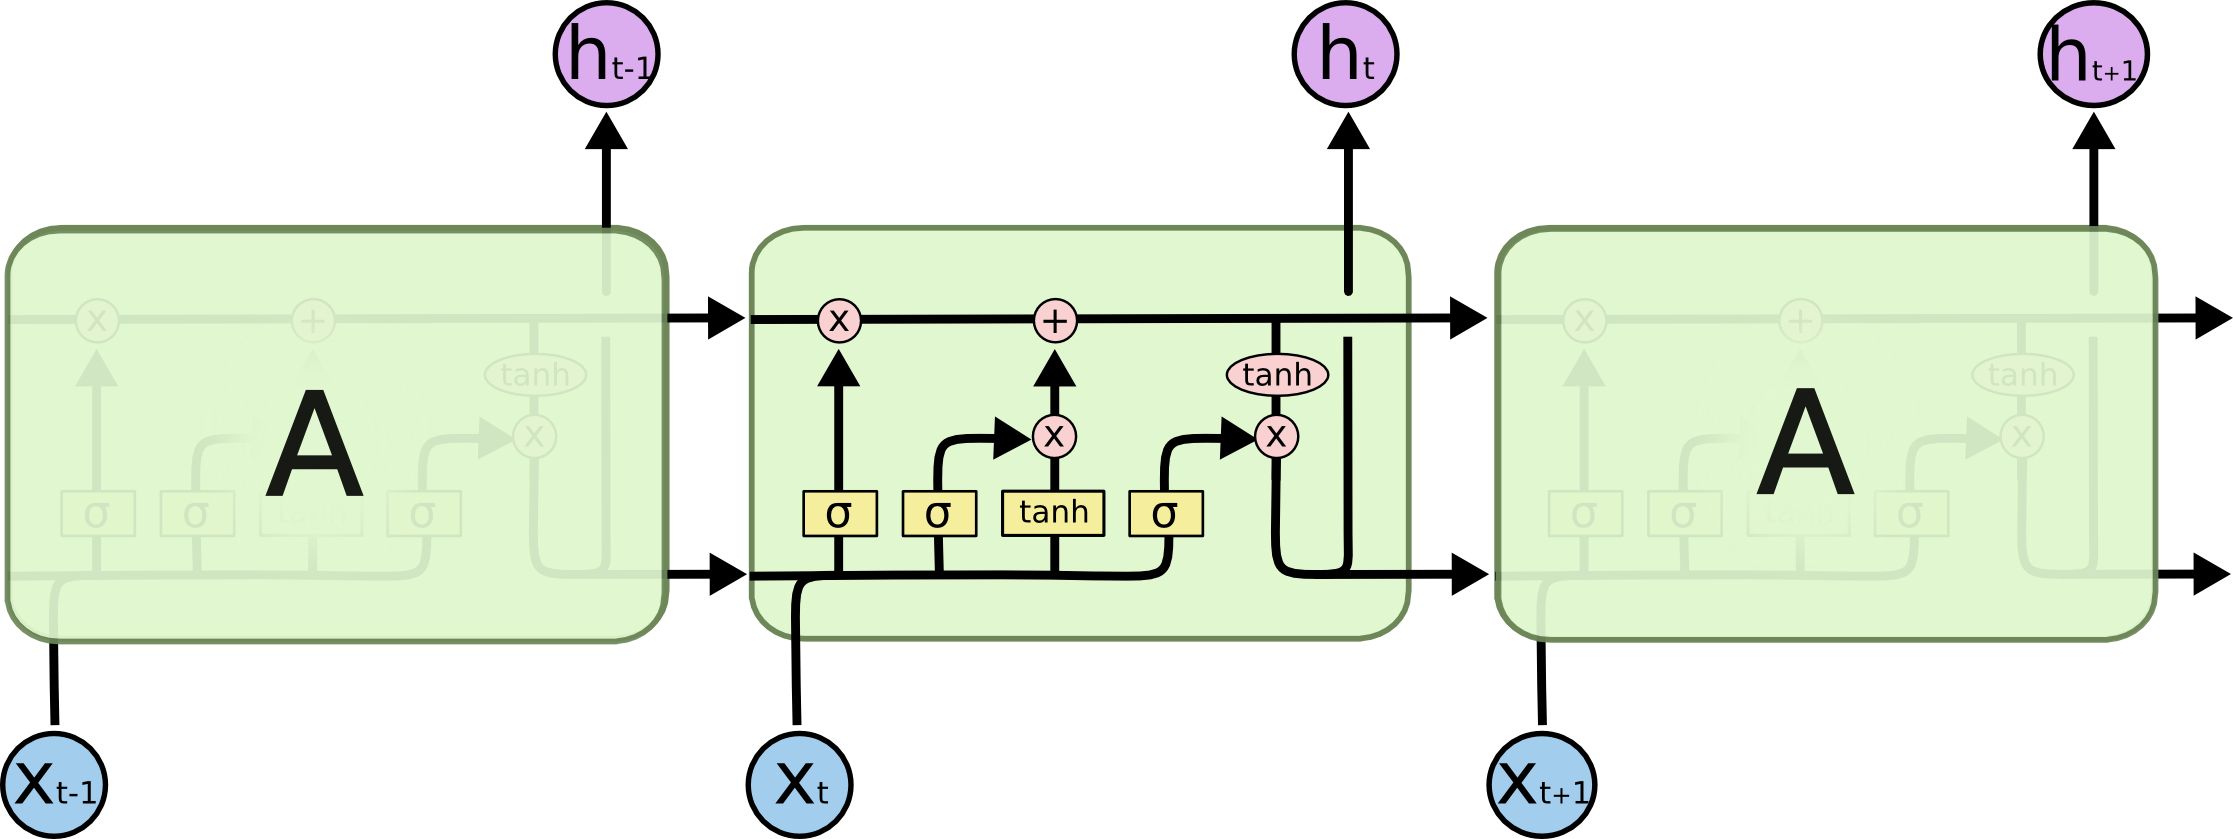

Las redes LSTM (Long Short Term Memory)son un tipo especial de redes recurrentes. La caracteristica principal de las redes recurrentes es que la información puede persistir introduciendo bucles en el diagrama de la red, por lo que, basicamente, pueden recordar estados previos y utilizar esta información para decidir cual será el siguiente. Una red recurrentes estandar puede modelar dependencias a corto plazo (es decir, relaciones cercanas en la serie cronologica), en cambio las LSTM pueden aprender dependencias largas, por lo que se podria decir que tienen una memoria a más largo plazo.

# **4. Autoencoders y detección de anomalías**
>Con el autoencoder, lo que se quiere lograr es que el modelo aprenda a reconstruir un dato normal, dado el caso en que el la clasificación obtenga un error grande, se puede catalogar como anomalía, la cual puede ser una helada blanca o una helada negra. Como podemos ver que el dataset está desbalanceado en cuanto a las clases, podemos decir que se trata de un problema de detección de anomalías usando un autoencoder de clasificación.

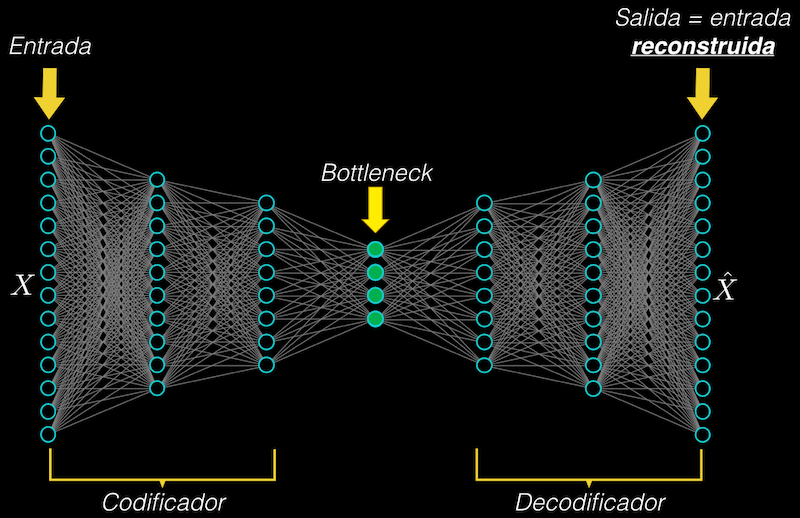

# **5. Marco teórico**
## **Heladas de radiación**
Las heladas de radiación son acontecimientos usuales. Se caracterizan por un
cielo despejado, en calma o con poco viento, inversión de temperatura,
temperaturas del punto de rocío bajas y temperaturas del aire que normalmente
caen por debajo de 0 °C durante la noche pero que están por encima de 0 °C
durante el día. La temperatura del punto de rocío es la temperatura que se alcanza
cuando el aire se enfría hasta que alcanza una humedad relativa del 100%, y es
una medida directa del contenido de vapor de agua del aire. 

## **Elementos meteorológicos que favorecen las heladas**
- **Temperatura del aire**: La temperatura del aire disminuye con la altura. Durante el día la radiación produce calentamiento de la tierra. En la noche, el suelo irradia calor hacia la atmósfera y se enfrían las capas de aire pŕoximas a él(Principalmente hasta los 20m). Cuando ocurre la condición atmosférica conocida como inversión térmica, por encima de una capa más fría, se presenta una capa con temperatura más alta. EN el extremo inferior de la capa de inversión térmica el aire frío que está en contacto con el suelo permanece estancado.

- **Nubosidad**: Las nubes actúan como sistemas que retienen calor, amortiguando las variaciones extremas de temperatura. DUrante el día interceptan la insolación disminuyendo la temperatura máxima. En la noche impiden el enfriamiento del suelo por irradiación atenuando la temperatura mínima. En consecuencia, la pérdida de calor del suelo es mayor cuando hay menor nubosidad, cuando existe mayor enfriamiento y peligro de heladas.

- **Viento**: Bajo condiciones normales, la temperatura disminuye con la altura; cuando el suelo se enfría debido a la pérdida de calor por irradiación, el aire pŕoximo al suelo permanece estacionario y su temperatura baja. En estas circunstancias el aire helado sobre el suelo será cubierto por aire más caliente. Si hay viento, ocurrirá mezcla de éstas y la temperatura del aire de la superficie aumentará. Por consiguiente, otra condición para que ocurra la helada es que en la noche el viento permanezca en calma.

- **Humedad del aire**: Al bajar la temperatura se produce la condesación del vapor de agua y la liberación del calor latente. A mayor humedad atmosférica mayor calor latente puede liberarse para contrarrestar el efecto de la disminuición de temperatura.


- **Punto del rocío**: La temperatura del punto de rocío, es la temperatura para la cual la humedad relativa del aire es el 100%. Esto se resume a cuando el aire está satura de vapor de agua, lo que da como resultado el fenómeno de condensación del vapor de agua generando neblina. Cuando la temperatura del punto de rocío llega a menos 0°C y la temperatura del aire no iguala el punto de rocío, se produce helada. 

####**Cálculo de temperatura de rocío**

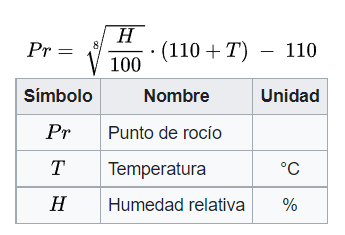

#### **Condiciones para la formación de heladas negras y blancas**

En esta tabla, medimos las condiciones de temperatura ambiente, humedad relativa minima, temperatura ambienta máxima diaria, temperatura del aire minima, humedad relativa máxima y velocidad del aire para clasificar el evento.

|TA|HRD|VA|TMAX|TMIN|NUB|TPR|T12|H12|Riesgo|Tipo de helada|
|--|--|--|--|--|--|--|--|--|--|--|
| A| B| B| A| A| A| A| A| A| Alto| Radiación (Negra)|
| M| B| B| A| A| A| A| A| A| Alto| Radiación (Negra)|
| B| B| B| A| A| A| A| A| A| Alto| Radiación (Negra)|
| A| B| B| A| A| M| A| A| A| Alto| Radiación (Negra)|
| M| B| B| A| A| M| A| A| A| Alto| Radiación (Negra)|
| B| B| B| A| A| M| A| A| A| Alto| Radiación (Negra)|
| A| B| B| A| A| A| B| A| A| Alto| Radiación (Blanca)|
| M| B| B| A| A| A| B| A| A| Alto| Radiación (Blanca)|
| B| B| B| A| A| A| B| A| A| Alto| Radiación (Blanca)|
| A| B| B| A| A| M| B| A| A| Alto| Radiación (Blanca)|
| M| B| B| A| A| M| B| A| A| Alto| Radiación (Blanca)|
| B| B| B| A| A| M| B| A| A| Alto| Radiación (Blanca)|



#**6. Construcción del dataset**

In [1]:
#@markdown Montar el Drive
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/IA2')
print(os.getcwd())

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1DuWIqtc8TQx7fCa1JV4ACV5cZoOK9lRO/IA2


In [2]:
#@markdown Cargar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


In [3]:
#@title **Carga de datos del IDEAM**

data_nubosidad = pd.read_csv('data/Nubosidad')
data_humedad_rm = pd.read_csv('data/HumedadRelativaMinima.csv')
data_humedad_rma = pd.read_csv('data/HumedadRelativaMaxima.csv')
data_humedad_rma = data_humedad_rma[data_humedad_rma['DescripcionSerie'] == 'Húmeda relativa calculada máxima diaria']
data_temp_aire = pd.read_csv('data/TempAireMin.csv')
data_temp_min = pd.read_csv('data/temperaturaMinima.csv')
data_vel_min = pd.read_csv('data/Velocidad-media-diaria.csv')
data_temp_max = pd.read_csv('data/temperaturaMaximaDiaria.csv')

In [4]:
#@title **Minería de datos**

df_ta = data_temp_aire[['Fecha','Valor']].copy()
df_ta['Fecha'] = pd.to_datetime(df_ta['Fecha'],yearfirst=True)
df_ta = df_ta.rename(columns={'Valor':'Temperatura del aire minima'})

df_tmd = data_temp_max[['Fecha','Valor']].copy()
df_tmd['Fecha'] = pd.to_datetime(df_tmd['Fecha'], yearfirst = True)
df_tmd = df_tmd.rename(columns ={'Valor':'Temperatura ambiente maxima'})

df_t_a_min = data_temp_min[['Fecha','Valor']].copy()
df_t_a_min['Fecha'] = pd.to_datetime(df_t_a_min['Fecha'],yearfirst=True)
df_t_a_min = df_t_a_min.rename(columns={'Valor':'Temperatura ambiente minima'})


df_n = data_nubosidad[['Fecha','Valor']].copy()
df_n= df_n.rename(columns={'Valor':'Nubosidad'})
df_n['Fecha'] = pd.to_datetime(df_n['Fecha'],yearfirst=True)



df_hrm = data_humedad_rm[['Fecha','Valor']].copy()
df_hrm= df_hrm.rename(columns={'Valor':'Humedad Relativa Minima'})
df_hrm['Fecha'] = pd.to_datetime(df_hrm['Fecha'],yearfirst=True)

df_hrma = data_humedad_rma[['Fecha','Valor']].copy()
df_hrma['Fecha'] = pd.to_datetime(df_hrma['Fecha'],yearfirst=True)
df_hrma = df_hrma.rename(columns={'Valor':'Humedad Relativa Maxima'})


df_vel_media = data_vel_min[['Fecha','Valor']].copy()
df_vel_media = df_vel_media.rename(columns={'Valor':'Velocidad Media de las 0 horas'})
df_vel_media.index = pd.to_datetime(df_vel_media['Fecha'])


#----------------------------------------------------
df_n.index = df_n['Fecha']
df_n = df_n.between_time('19:00','00:00')
df_n.index = df_n.index.normalize()
df_n['Fecha'] = df_n.index
df_n.index = np.arange(df_n.shape[0])
df_n['Fecha'] = pd.to_datetime(df_n['Fecha'], yearfirst = True)
#-------------------------------------------------------

df_vel_media = df_vel_media.between_time('23:30','00:00')
df_vel_media.index = np.arange(df_vel_media.shape[0])
df_vel_media['Fecha'] = pd.to_datetime(df_vel_media['Fecha'], yearfirst = True)
#---------------------------------------------
fechas = pd.date_range(start='1/01/2016', end='16/05/2021')
df_fechas = pd.DataFrame({'Fecha':fechas})
#--------------------------------------------



In [5]:
#@title **Definición de Targets**
data = pd.merge(left = df_fechas, right = df_t_a_min, how = 'left', left_on ='Fecha', right_on='Fecha')
data = pd.merge(left = data, right = df_hrma,how ='left', left_on ='Fecha' ,right_on ='Fecha' )
data = pd.merge(left = data, right = df_ta ,how ='left', left_on ='Fecha' ,right_on ='Fecha' )
data = pd.merge(left = data, right =df_hrm ,how ='left', left_on ='Fecha' ,right_on ='Fecha' )
data = pd.merge(left = data, right =df_vel_media ,how ='left', left_on ='Fecha' ,right_on ='Fecha' )
data = pd.merge(left = data, right =df_tmd ,how ='left', left_on ='Fecha' ,right_on ='Fecha' )
data = pd.merge(left = data, right =df_n ,how ='left', left_on ='Fecha' ,right_on ='Fecha' )
data.index = data['Fecha']
data = data.drop('Fecha', axis = 1)
#contar valores nulos

data['Temperatura ambiente minima']=data['Temperatura ambiente minima'].interpolate()
data['Temperatura ambiente maxima']=data['Temperatura ambiente maxima'].interpolate()
data['Humedad Relativa Minima'] = data['Humedad Relativa Minima'].interpolate()
data.loc['2017',['Humedad Relativa Maxima']] = data.loc['2019',['Humedad Relativa Maxima']].values
data['Humedad Relativa Maxima'] = data['Humedad Relativa Maxima'].interpolate(method ='polynomial',order = 3)
data.loc['2019',['Temperatura del aire minima']]= data.loc['2019',['Temperatura del aire minima']].interpolate()
data.loc['2017-11-01':'2018-01-01',['Temperatura ambiente minima']] =  data.loc['2018-11-01':'2019-01-01',['Temperatura ambiente minima']].values
data.loc['2017-11-01':'2018-01-01',['Temperatura ambiente maxima']] =  data.loc['2018-11-01':'2019-01-01',['Temperatura ambiente maxima']].values
data.loc['2017-11-01':'2018-01-01',['Humedad Relativa Minima']] = data.loc['2018-11-01':'2019-01-01',['Humedad Relativa Minima']].values
data.loc['2017-12-01':'2017-12-31',['Temperatura del aire minima']] = data.loc['2019-12-01':'2019-12-31',['Temperatura del aire minima']].values
data.loc['2017-01-01':'2017-01-31',['Temperatura del aire minima']] = data.loc['2019-01-01':'2019-01-31',['Temperatura del aire minima']].values
data.loc['2021-03-01':'2021-03-30',['Temperatura del aire minima']] = data.loc['2019-03-01':'2019-03-30',['Temperatura del aire minima']].values
data.loc['2021-04-01':'2021-04-20',['Temperatura del aire minima']] = data.loc['2019-04-01':'2019-04-20',['Temperatura del aire minima']].values
data['Temperatura del aire minima'] = data['Temperatura del aire minima'].interpolate()
data.loc['2017-11-01':'2017-12-31',['Nubosidad']] = data.loc['2019-11-01':'2019-12-31',['Nubosidad']].values
data['Nubosidad'] = data['Nubosidad'].fillna(int(data['Nubosidad'].notnull().mean()))
data.loc['2017-01-01':'2017-01-31',['Velocidad Media de las 0 horas']] = data.loc['2019-01-01':'2019-01-31',['Velocidad Media de las 0 horas']].values
data.loc['2021-03-01':'2021-03-31',['Velocidad Media de las 0 horas']] = data.loc['2019-03-01':'2019-03-31',['Velocidad Media de las 0 horas']].values
data.loc['2021-04-01':'2021-04-20',['Velocidad Media de las 0 horas']] = data.loc['2019-04-01':'2019-04-20',['Velocidad Media de las 0 horas']].values
data.loc['2016-01-01':'2016-12-31',['Velocidad Media de las 0 horas']] = data.loc['2020-01-01':'2020-12-31',['Velocidad Media de las 0 horas']].values
data['Velocidad Media de las 0 horas'] = data['Velocidad Media de las 0 horas'].interpolate()
data['Temperatura punto de rocio minima'] = (((data['Humedad Relativa Minima'])/100)**(1/8))*(110+data['Temperatura del aire minima'])-110
data[data['Nubosidad']==0] =1
#data['Humedad Relativa Minima'] = data['Humedad Relativa Minima'].fillna(data['Humedad Relativa Minima'].notnull().mean())
for col in data.columns:
    print (col+' = ', np.sum(pd.isnull(data[col]))) 


Temperatura ambiente minima =  0
Humedad Relativa Maxima =  0
Temperatura del aire minima =  0
Humedad Relativa Minima =  0
Velocidad Media de las 0 horas =  0
Temperatura ambiente maxima =  0
Nubosidad =  0
Temperatura punto de rocio minima =  0


In [ ]:
#@title **Matriz de Correlación** 
data.corr()

,Temperatura ambiente minima,Humedad Relativa Maxima,Temperatura del aire minima,Humedad Relativa Minima,Velocidad Media de las 0 horas,Temperatura ambiente maxima,Nubosidad,Temperatura punto de rocio minima
Temperatura ambiente minima,1.000000,0.264763,0.866518,0.484799,0.311068,-0.258569,0.508822,0.678905
Humedad Relativa Maxima,0.264763,1.000000,0.286840,0.496359,0.132097,0.296198,0.377937,0.229539
Temperatura del aire minima,0.866518,0.286840,1.000000,0.469571,0.332718,-0.208843,0.501343,0.707603
Humedad Relativa Minima,0.484799,0.496359,0.469571,1.000000,0.144371,-0.230857,0.480201,0.790929
Velocidad Media de las 0 horas,0.311068,0.132097,0.332718,0.144371,1.000000,-0.235801,0.142404,0.199635
Temperatura ambiente maxima,-0.258569,0.296198,-0.208843,-0.230857,-0.235801,1.000000,-0.136508,-0.414566
Nubosidad,0.508822,0.377937,0.501343,0.480201,0.142404,-0.136508,1.000000,0.486068
Temperatura punto de rocio minima,0.678905,0.229539,0.707603,0.790929,0.199635,-0.414566,0.486068,1.000000


In [ ]:
#@title **Descripción de los datos**
data.describe()

,Temperatura ambiente minima,Humedad Relativa Maxima,Temperatura del aire minima,Humedad Relativa Minima,Velocidad Media de las 0 horas,Temperatura ambiente maxima,Nubosidad,Temperatura punto de rocio minima
count,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000,1963.000000
mean,4.812379,90.814196,5.441212,67.817117,3.897503,14.169333,2.618441,-0.345191
std,2.951255,11.086633,2.669662,17.824483,2.257519,2.110111,0.683731,6.170575
min,-8.000000,1.000000,-8.000000,0.000000,0.450000,1.000000,1.000000,-110.000000
25%,3.400000,88.000000,4.400000,59.000000,2.100000,13.200000,2.000000,-2.404366
50%,5.800000,93.000000,6.300000,69.000000,3.525000,14.400000,3.000000,0.971675
75%,7.000000,95.000000,7.300000,80.000000,5.291667,15.400000,3.000000,3.485331
max,9.000000,116.294540,9.400000,100.000000,13.341667,20.000000,4.000000,8.700000


In [6]:

#@title **Clasificación de variables**
prueba = data.copy()
bins = [-999, 1.5, 15, 27]
names = ["Alto", "Medio", "Bajo"]
prueba['Grado Aire Minima'] = pd.cut(prueba['Temperatura del aire minima'], bins, labels = names)
prueba['Grado Temperatura Ambiente minima'] = pd.cut(prueba['Temperatura ambiente minima'], bins, labels = names)


bins2 = [-999, 2, 13, 27]
names_temp = ["Bajo","Medio","Alto"]
prueba['Grado temperatura Ambiente maxima'] = pd.cut(prueba['Temperatura ambiente maxima'], bins2, labels = names_temp)

bins3 = [-999,0,50]
names_temp2 = ["Alto","Bajo"]
prueba['Grado punto rocio'] = pd.cut(prueba['Temperatura punto de rocio minima'], bins3, labels = names_temp2)

vels = [0, 6, 14, 999]
names_vel = ["Bajo","Medio","Alto"]
prueba['Grado velocidad'] = pd.cut(prueba['Velocidad Media de las 0 horas'], vels, labels = names_vel)
 

bins4 = [0,1,2,4]
prueba['Grado Nubosidad'] = pd.cut(prueba['Nubosidad'], bins4, labels = names)


bins5 = [0,60,80,100]
prueba['Grado HR minima'] = pd.cut(prueba['Humedad Relativa Minima'], bins5, labels = names)


bins6 = [0,60,80,100]
prueba['Grado HR maxima'] = pd.cut(prueba['Humedad Relativa Maxima'], bins6, labels = names)



In [7]:

#@title **Construcción del target**
targets = prueba.iloc[:,7:]
targets['Clase Helada'] = np.zeros(targets.shape[0])


import numpy as np
import pandas as pd

                     
condicion1 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Alto") & (targets['Grado HR minima'] == "Alto") & (targets['Grado HR maxima'] == "Medio")  & (targets['Grado velocidad'] == "Bajo") & (targets['Grado temperatura Ambiente maxima'] == "Alto")
condicion2 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Alto") & (targets['Grado HR minima'] == "Alto") & (targets['Grado HR maxima'] == "Bajo")  & (targets['Grado velocidad'] == "Bajo") & (targets['Grado temperatura Ambiente maxima'] == "Alto")
condicion3 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Medio") & (targets['Grado HR minima'] == "Alto") & (targets['Grado HR maxima'] == "Bajo")  & (targets['Grado velocidad'] == "Bajo") & (targets['Grado temperatura Ambiente maxima'] == "Alto")

condicion4 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Alto") & (targets['Grado HR minima'] == "Alto") & (targets['Grado HR maxima'] == "Alto")  & (targets['Grado velocidad'] == "Bajo") & (targets['Grado temperatura Ambiente maxima'] == "Alto")
condicion5 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Alto") & (targets['Grado HR minima'] == "Alto") & (targets['Grado HR maxima'] == "Medio")  & (targets['Grado velocidad'] == "Bajo") & (targets['Grado temperatura Ambiente maxima'] == "Alto")


condicion6 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Alto") & (targets['Grado HR minima'] == "Alto") & (targets['Grado HR maxima'] == "Medio")  & (targets['Grado velocidad'] == "Bajo") 
condicion7 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Alto") & (targets['Grado HR minima'] == "Alto") & (targets['Grado HR maxima'] == "Bajo")  & (targets['Grado velocidad'] == "Bajo") 
condicion8 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Medio") & (targets['Grado HR minima'] == "Alto") & (targets['Grado HR maxima'] == "Bajo")  & (targets['Grado velocidad'] == "Bajo") 

condicion9 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Alto") & (targets['Grado HR minima'] == "Alto") & (targets['Grado velocidad'] == "Bajo") 
condicion10 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Medio") & (targets['Grado HR minima'] == "Alto") & (targets['Grado velocidad'] == "Bajo") 
condicion11 = (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Nubosidad'] =="Alto") & (targets['Grado Aire Minima'] == "Alto")


condiciones = [condicion1,condicion2,condicion3,condicion4,condicion5,condicion6, condicion7,condicion8,condicion9,condicion10,condicion11]
elecciones = np.array(( "Helada Negra","Helada Negra","Helada Negra","Helada Negra","Helada Negra", "Helada Negra","Helada Negra","Helada Negra","Helada Negra","Helada Negra","Helada Negra"))
targets["Clase Helada"] = np.select(condiciones, elecciones, "Sin Peligro")
data['Tipo'] = targets['Clase Helada']

In [8]:

#@title **Construcción del target**
targets = prueba.iloc[:,7:]
targets['Clase Helada'] = np.zeros(targets.shape[0])


import numpy as np
import pandas as pd

                     
condicion1 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Alto") & (targets['Grado HR minima'] == "Alto")  & (targets['Grado velocidad'] == "Bajo") 
condicion2 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Alto") & (targets['Grado HR minima'] == "Alto") & (targets['Grado velocidad'] == "Bajo") 
condicion3 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Medio") & (targets['Grado HR minima'] == "Alto")   & (targets['Grado velocidad'] == "Bajo") 

condicion4 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Alto") & (targets['Grado HR minima'] == "Alto")   & (targets['Grado velocidad'] == "Bajo") 
condicion5 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Alto") & (targets['Grado HR minima'] == "Alto")   & (targets['Grado velocidad'] == "Bajo") 


condicion6 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Alto") & (targets['Grado HR minima'] == "Alto")  & (targets['Grado velocidad'] == "Bajo") 
condicion7 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Alto") & (targets['Grado HR minima'] == "Alto")   & (targets['Grado velocidad'] == "Bajo") 
condicion8 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Medio") & (targets['Grado HR minima'] == "Alto")  & (targets['Grado velocidad'] == "Bajo") 

condicion9 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Alto") & (targets['Grado HR minima'] == "Alto") & (targets['Grado velocidad'] == "Bajo") 
condicion10 = (targets['Grado Aire Minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado Nubosidad'] == "Medio") & (targets['Grado HR minima'] == "Alto") & (targets['Grado velocidad'] == "Bajo") 
condicion11 = (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Nubosidad'] =="Alto") & (targets['Grado Aire Minima'] == "Alto" )& (targets['Grado HR minima'] == "Alto")
condicion12 = (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Nubosidad'] =="Bajo") & (targets['Grado Aire Minima'] == "Alto" )& (targets['Grado HR minima'] == "Medio")
condicion13 = (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Nubosidad'] == "Alto") & ( targets['Grado Aire Minima'] == "Alto") & (targets['Grado HR minima'] == "Medio")
condicion14 = (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Nubosidad'] == "Alto") & ( targets['Grado Aire Minima'] == "Alto") & (targets['Grado HR minima'] == "Bajo")
condicion15 = (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Nubosidad'] == "Medio") & ( targets['Grado Aire Minima'] == "Alto") & (targets['Grado HR minima'] == "Bajo")
condicion16 = (targets['Grado Temperatura Ambiente minima'] == "Alto") & (targets['Grado punto rocio'] == "Alto") & (targets['Grado Nubosidad'] == "Medio") & ( targets['Grado Aire Minima'] == "Alto") & (targets['Grado HR minima'] == "Medio")

condiciones = [condicion1,condicion2,condicion3,condicion4,condicion5,condicion6, condicion7,condicion8,condicion9,condicion10,condicion11,condicion12,condicion13,condicion14,condicion15,condicion16]
elecciones = np.array(( "Helada Negra","Helada Negra","Helada Negra","Helada Negra","Helada Negra", "Helada Negra","Helada Negra","Helada Negra","Helada Negra","Helada Negra","Helada Negra","Helada Blanca", "Helada Blanca","Helada Blanca","Helada Blanca","Helada Blanca"))
targets["Clase Helada"] = np.select(condiciones, elecciones, "Sin Peligro")
data['Tipo'] = targets['Clase Helada']

In [9]:
#@title **Numero de datos por clase** 
data['Tipo'].value_counts()

Sin Peligro      1805
Helada Negra      100
Helada Blanca      58
Name: Tipo, dtype: int64

#**7. Evidencias**

#### Helada negra el 13 de diciembre de 2020

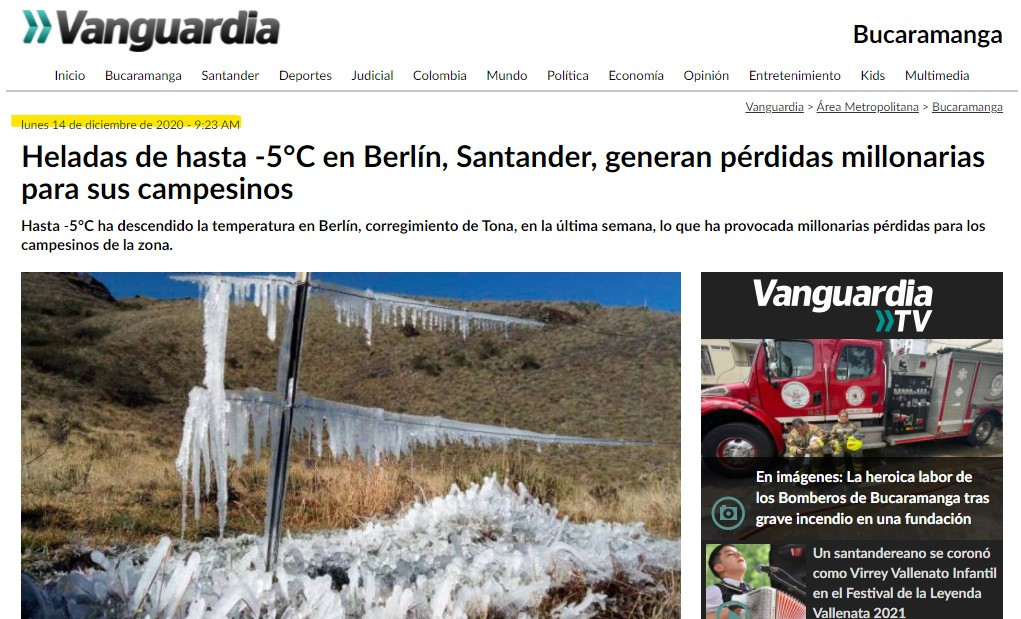

In [ ]:
#@markdown Fecha de la noticia 
data[data.index =='2020-12-13']

,Temperatura ambiente minima,Humedad Relativa Maxima,Temperatura del aire minima,Humedad Relativa Minima,Velocidad Media de las 0 horas,Temperatura ambiente maxima,Nubosidad,Temperatura punto de rocio minima,Tipo
Fecha,,,,,,,,,
2020-12-13,-5.0,75.0,-4.5,25.0,2.058333,14.8,1.0,-21.285428,Helada Negra


#### Helada negra el 5 de diciembre de 2021

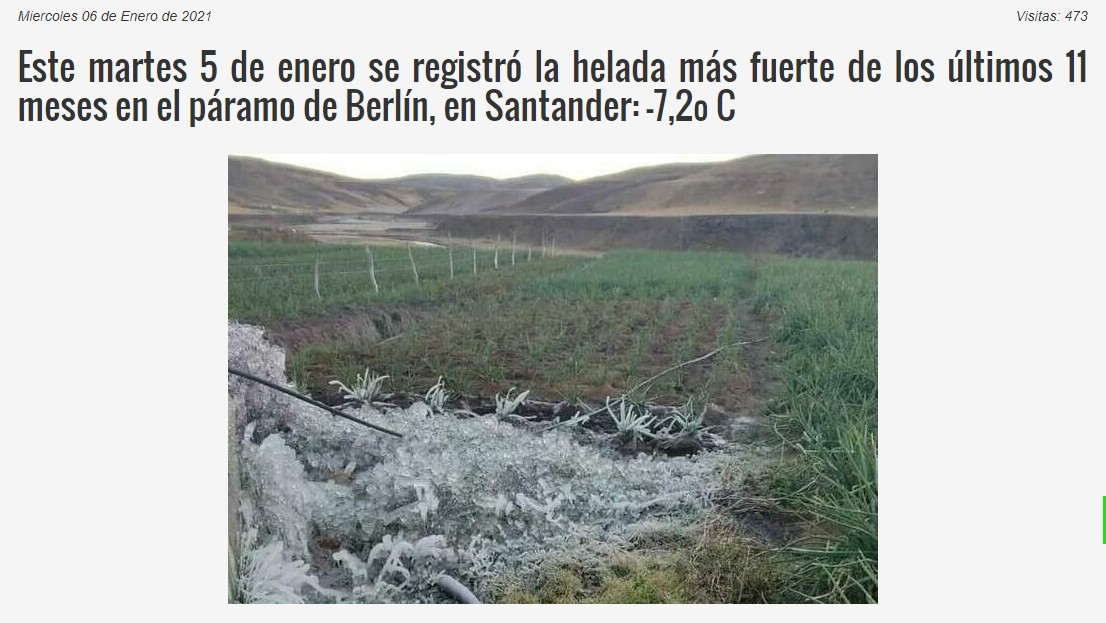

In [ ]:
#@markdown Fecha de la noticia 
data[data.index =='2021-01-05']

,Temperatura ambiente minima,Humedad Relativa Maxima,Temperatura del aire minima,Humedad Relativa Minima,Velocidad Media de las 0 horas,Temperatura ambiente maxima,Nubosidad,Temperatura punto de rocio minima,Tipo
Fecha,,,,,,,,,
2021-01-05,-7.6,87.0,-6.6,11.0,2.266667,14.8,2.0,-31.531631,Helada Negra


#**8.Implementación**

##**LSTM multivariadas** 



In [10]:
#@markdown Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
import os
from sklearn.preprocessing import MinMaxScaler ,  StandardScaler
from __future__ import absolute_import, division, print_function, unicode_literals
from numpy import array
from numpy import hstack
#setting figure size
from matplotlib.pylab import rcParams
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import seaborn as sns
sns.set_theme()

In [11]:
datos = data.copy()
datos.head(5)

,Temperatura ambiente minima,Humedad Relativa Maxima,Temperatura del aire minima,Humedad Relativa Minima,Velocidad Media de las 0 horas,Temperatura ambiente maxima,Nubosidad,Temperatura punto de rocio minima,Tipo
Fecha,,,,,,,,,
2016-01-01,7.4,95.000000,8.0,74.000000,2.175000,12.6,3.0,3.641242,Sin Peligro
2016-01-02,7.2,98.000000,7.4,81.000000,2.050000,12.4,3.0,4.348040,Sin Peligro
2016-01-03,6.4,100.000000,6.9,97.000000,1.475000,15.2,3.0,6.455761,Sin Peligro
2016-01-04,6.8,101.219670,8.0,97.333333,1.475000,14.8,3.0,7.602000,Sin Peligro
2016-01-05,2.8,101.361809,3.3,97.666667,3.483333,14.2,3.0,2.966118,Sin Peligro


In [15]:
#@title **Escalar Datos**
datos = data.copy()
mscs = MinMaxScaler()
datos['Humedad Relativa Maxima'] = mscs.fit_transform(datos[['Humedad Relativa Maxima']].values)
datos['Temperatura ambiente minima'] = mscs.fit_transform(datos[['Temperatura ambiente minima']].values)
datos['Temperatura ambiente maxima'] = mscs.fit_transform(datos[['Temperatura ambiente maxima']].values)
datos['Velocidad Media de las 0 horas'] = mscs.fit_transform(datos[['Velocidad Media de las 0 horas']].values)
datos['Humedad Relativa Minima'] = mscs.fit_transform(datos[['Humedad Relativa Minima']].values)
datos['Temperatura punto de rocio minima'] = mscs.fit_transform(datos[['Temperatura punto de rocio minima']])
datos['Nubosidad'] = mscs.fit_transform(datos[['Nubosidad']].values)
datos['Temperatura del aire minima'] = mscs.fit_transform(datos[['Temperatura del aire minima']].values)

In [16]:
#@title **Función de ventaneo**
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# encuentra el final de este patrón
		end_ix = i + n_steps 
		# comprobar si estamos más allá del conjunto de datos
		if end_ix > len(sequences)-1:
			break
		# recopilar partes de entrada y salida del patrón
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [17]:
#@title **Tratamiento de datos**
rangee = datos['Temperatura del aire minima'].isnull().sum()
#definir la secuencia de entrada
stop = datos['Temperatura del aire minima'].isnull().idxmax()
#preparar datos
series = datos
in_seq1 = series[['Temperatura ambiente minima']].values
in_seq2 = series[['Temperatura ambiente maxima']].values
in_seq3 = series[['Velocidad Media de las 0 horas']].values
in_seq4 = series[['Humedad Relativa Minima']].values
in_seq5 = series[['Nubosidad']].values
in_seq6 = series[['Temperatura punto de rocio minima']].values
in_seq7 = series[['Humedad Relativa Maxima']].values
out_seq = series[['Temperatura del aire minima']].values
#Definir dataset
dataset = np.hstack((in_seq1, in_seq2, in_seq3 , in_seq4 , in_seq5 , in_seq6, in_seq7 , out_seq))
n_steps=30
split = round(len(series)*0.3)
train , test  = dataset[0:-split , ] , dataset[-split+n_steps:,]
X , y = split_sequences(train , n_steps)
n_features = X.shape[2]

In [18]:
#@title  
epochs = 100
batch_size = 32

model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=False, input_shape=(n_steps, n_features)))


model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X, y, epochs=50,validation_split=0.1, verbose=1 , batch_size=batch_size)


Epoch 1/50
38/38 [==============================] - 7s 82ms/step - loss: 0.0917 - val_loss: 0.0158
Epoch 2/50
38/38 [==============================] - 3s 75ms/step - loss: 0.0193 - val_loss: 0.0156
Epoch 3/50
38/38 [==============================] - 3s 75ms/step - loss: 0.0184 - val_loss: 0.0146
Epoch 4/50
38/38 [==============================] - 3s 78ms/step - loss: 0.0182 - val_loss: 0.0138
Epoch 5/50
38/38 [==============================] - 3s 76ms/step - loss: 0.0175 - val_loss: 0.0139
Epoch 6/50
38/38 [==============================] - 3s 76ms/step - loss: 0.0172 - val_loss: 0.0135
Epoch 7/50
38/38 [==============================] - 3s 77ms/step - loss: 0.0170 - val_loss: 0.0153
Epoch 8/50
38/38 [==============================] - 3s 76ms/step - loss: 0.0164 - val_loss: 0.0136
Epoch 9/50
38/38 [==============================] - 3s 76ms/step - loss: 0.0164 - val_loss: 0.0131
Epoch 10/50
38/38 [==============================] - 3s 75ms/step - loss: 0.0160 - val_loss: 0.0136
Epoch 11/

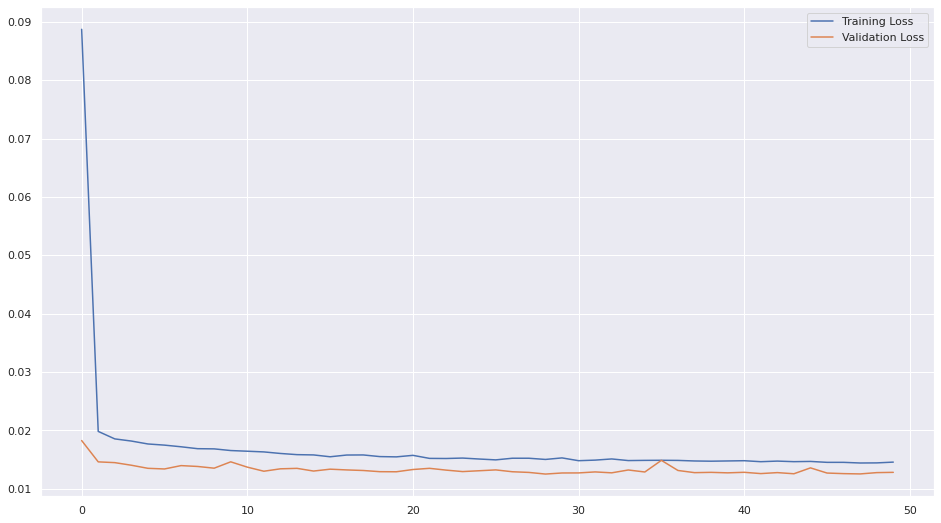

In [ ]:
#@title Función de costo
plt.plot(history.history['loss'] , label = 'Training Loss')
plt.plot(history.history['val_loss'] , label = 'Validation Loss')
plt.legend()

In [19]:
#@title **Realizar predicciones con los datos de entrenamiento**
X, y = split_sequences(test, n_steps)
predictions1 , predictions2 , predictions3 , predictions4 , predictions5 , predictions6 , predictions7 , predictions8 = list(), list(), list() , list() , list() , list(), list() , list()
for i in range(len(test)-n_steps):
  x_input = X[i]
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input , verbose=0)
  predictions1.append(yhat[0,0])
  predictions2.append(yhat[0,1])
  predictions3.append(yhat[0,2])
  predictions4.append(yhat[0,3])
  predictions5.append(yhat[0,4])
  predictions6.append(yhat[0,5])
  predictions7.append(yhat[0,6])
  predictions8.append(yhat[0,7])  

In [20]:
#@markdown Fuentes
fuente = {
    'fontsize': 16, # Tamaño de la fuente
    'fontweight': "heavy", # Puede ser 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
    'family' : 'cursive' # Puede ser 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
}

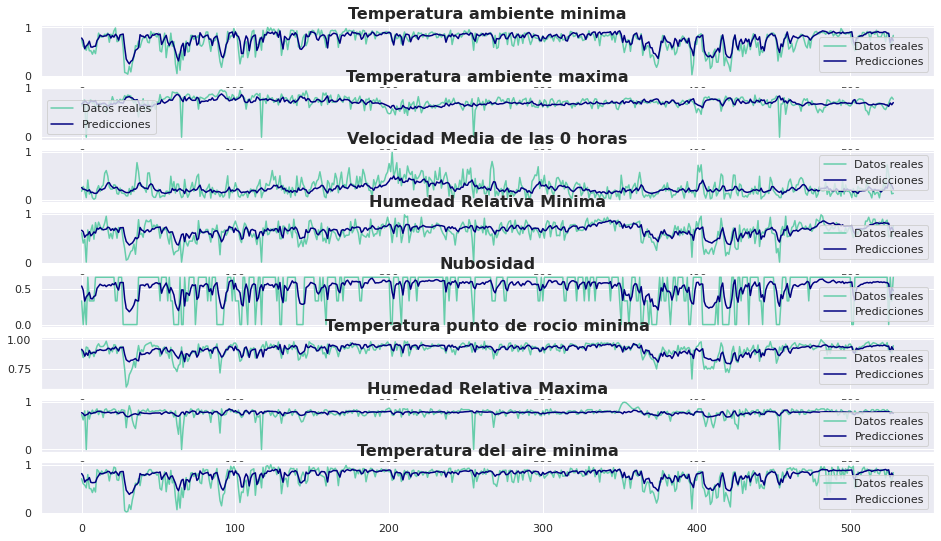

In [25]:
#@title **Graficas**
plt.subplot(811)

plt.plot(test[n_steps:,0] , c = 'mediumaquamarine' , label = 'Datos reales')
plt.plot(predictions1 , c = 'navy' ,  label = 'Predicciones')
plt.title('Temperatura ambiente minima' ,  fontdict = fuente )
plt.legend()


plt.subplot(812)
plt.plot(test[n_steps:,1] , c = 'mediumaquamarine' , label = 'Datos reales')
plt.plot(predictions2 , c = 'navy' ,  label = 'Predicciones')
plt.title('Temperatura ambiente maxima' ,  fontdict = fuente )
plt.legend()

plt.subplot(813)
plt.plot(test[n_steps:,2] , c = 'mediumaquamarine' , label = 'Datos reales')
plt.plot(predictions3 , c = 'navy' ,  label = 'Predicciones')
plt.title('Velocidad Media de las 0 horas' ,  fontdict = fuente )
plt.legend()

plt.subplot(814)
plt.plot(test[n_steps:,3] , c = 'mediumaquamarine' , label = 'Datos reales')
plt.plot(predictions4 , c = 'navy' ,  label = 'Predicciones')
plt.title('Humedad Relativa Minima' ,  fontdict = fuente )
plt.legend()
plt.subplot(815)
plt.plot(test[n_steps:,4] , c = 'mediumaquamarine' , label = 'Datos reales')
plt.plot(predictions5 , c = 'navy' ,  label = 'Predicciones')
plt.title('Nubosidad' ,  fontdict = fuente )
plt.legend()


plt.subplot(816)
plt.plot(test[n_steps:,5] , c = 'mediumaquamarine' , label = 'Datos reales')
plt.plot(predictions6 , c = 'navy' ,  label = 'Predicciones')
plt.title('Temperatura punto de rocio minima' ,  fontdict = fuente )
plt.legend()

plt.subplot(817)
plt.plot(test[n_steps:,6] , c = 'mediumaquamarine' , label = 'Datos reales')
plt.plot(predictions7 , c = 'navy' ,  label = 'Predicciones')
plt.title('Humedad Relativa Maxima' ,  fontdict = fuente )
plt.legend()

plt.subplot(818)
plt.plot(test[n_steps:,7] , c = 'mediumaquamarine' , label = 'Datos reales')
plt.plot(predictions8 , c = 'navy' ,  label = 'Predicciones')
plt.title('Temperatura del aire minima' ,  fontdict = fuente )
plt.legend()

In [26]:
#@title **Cálculo RMSE**
import math
rmse = math.sqrt(mean_squared_error(test[n_steps:,0], predictions1))
print('Test RMSE Temperatura ambiente minima: %.3f' % rmse)
rmse = math.sqrt(mean_squared_error(test[n_steps:,1], predictions2))
print('Test RMSE Temperatura ambiente maxima: %.3f' % rmse)
rmse = math.sqrt(mean_squared_error(test[n_steps:,2], predictions3))
print('Test RMSE Velocidad Media de las 0 horas: %.3f' % rmse)
rmse = math.sqrt(mean_squared_error(test[n_steps:,3], predictions4))
print('Test RMSE Humedad Relativa Minima: %.3f' % rmse)
rmse = math.sqrt(mean_squared_error(test[n_steps:,4], predictions5))
print('Test RMSE Nubosidad: %.3f' % rmse)
rmse = math.sqrt(mean_squared_error(test[n_steps:,5], predictions6))
print('Test RMSE Temperatura punto de rocio minima: %.3f' % rmse)
rmse = math.sqrt(mean_squared_error(test[n_steps:,6], predictions7))
print('Test RMSE Temperatura del aire minima: %.3f' % rmse)

Test RMSE Temperatura ambiente minima: 0.127
Test RMSE Temperatura ambiente maxima: 0.107
Test RMSE Velocidad Media de las 0 horas: 0.153
Test RMSE Humedad Relativa Minima: 0.152
Test RMSE Nubosidad: 0.211
Test RMSE Temperatura punto de rocio minima: 0.044
Test RMSE Temperatura del aire minima: 0.104


In [ ]:
#@title **Predicciones**
datosp = datos
time = 3
for i in range(time*5):
  datosp = datosp.append(pd.Series(dtype='float64') , ignore_index=True)
rangee = datosp['Temperatura ambiente minima'].isnull().sum()
for xxxx in range(rangee):
  #definir la secuencia de entrada
  stop = datosp['Temperatura ambiente minima'].isnull().idxmax()
  x_input = datosp.loc[: , ('Temperatura ambiente minima' , 'Temperatura ambiente maxima' , 'Velocidad Media de las 0 horas' , 
                    'Humedad Relativa Minima' , 'Temperatura punto de rocio minima' , 'Nubosidad', 'Humedad Relativa Maxima','Temperatura del aire minima' )].loc[stop-n_steps:stop-1].values
  #x_input = datosp[['Temperatura ambiente minima' , 'Temperatura ambiente maxima' , 'Velocidad Media de las 0 horas' , 
   #                 'Humedad Relativa Minima' , 'Temperatura punto de rocio minima' , 'Nubosidad', 'Temperatura del aire minima' ]].loc[stop-n_steps:stop-1].values
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  datosp['Temperatura ambiente minima'][stop] = yhat[0,0]
  datosp['Temperatura ambiente maxima'][stop] = yhat[0,1]
  datosp['Velocidad Media de las 0 horas'][stop] = yhat[0,2]
  datosp['Humedad Relativa Minima'][stop] = yhat[0,3]
  datosp['Temperatura punto de rocio minima'][stop] = yhat[0,4]
  datosp['Nubosidad'][stop] = yhat[0,5]
  datosp['Humedad Relativa Maxima'][stop] = yhat[0,6]
  
  datosp['Temperatura del aire minima'][stop] = yhat[0,7]
  print("low data:",xxxx+1,"/",rangee)

In [28]:
#@title **Arreglo fechas**
import pandas as pd
from datetime import datetime
listaFecha = pd.date_range( start='2016-01-01' , end='2021-05-31')
datosp.index = listaFecha
datosp.tail(15)
pru = datosp.tail(15)

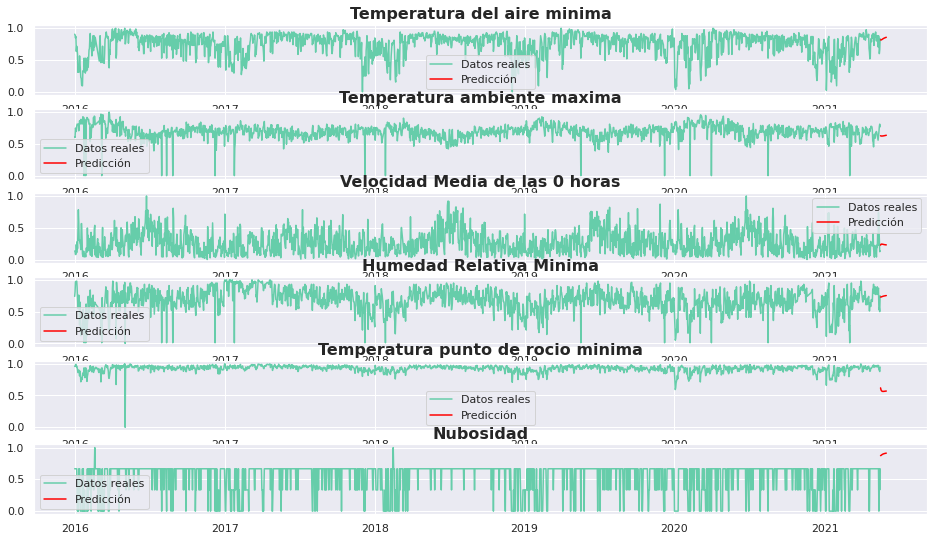

In [35]:
#@title **Graficas**
plt.subplot(611)
plt.plot(datos['Temperatura ambiente minima'] ,  c = 'mediumaquamarine' , label = 'Datos reales')
plt.plot(pru['Temperatura ambiente minima'] , c = 'red' , label = 'Predicción')
plt.title('Temperatura del aire minima' ,  fontdict = fuente )
plt.legend()

plt.subplot(612)
plt.plot(datos['Temperatura ambiente maxima'] ,  c = 'mediumaquamarine' , label = 'Datos reales')
plt.plot(pru['Temperatura ambiente maxima'] , c = 'red' , label = 'Predicción')
plt.title('Temperatura ambiente maxima' ,  fontdict = fuente )
plt.legend()

plt.subplot(613)
plt.plot(datos['Velocidad Media de las 0 horas'] ,  c = 'mediumaquamarine' , label = 'Datos reales')
plt.plot(pru['Velocidad Media de las 0 horas'] , c = 'red' , label = 'Predicción')
plt.title('Velocidad Media de las 0 horas' ,  fontdict = fuente )
plt.legend()

plt.subplot(614)
plt.plot(datos['Humedad Relativa Minima'] ,  c = 'mediumaquamarine' , label = 'Datos reales')
plt.plot(pru['Humedad Relativa Minima'] , c = 'red' , label = 'Predicción')
plt.title('Humedad Relativa Minima' ,  fontdict = fuente )
plt.legend()

plt.subplot(615)
plt.plot(datos['Temperatura punto de rocio minima'] ,  c = 'mediumaquamarine' , label = 'Datos reales')
plt.plot(pru['Temperatura punto de rocio minima'] , c = 'red' , label = 'Predicción')
plt.title('Temperatura punto de rocio minima' ,  fontdict = fuente )
plt.legend()


plt.subplot(616)
plt.plot(datos['Nubosidad'] ,  c = 'mediumaquamarine' , label = 'Datos reales')
plt.plot(pru['Nubosidad'] , c = 'red' , label = 'Predicción')
plt.title('Nubosidad' ,  fontdict = fuente )
plt.legend()


## **AUTOENCODER DE DETECCIÓN DE ANOMALÍAS**

#### **DATOS NORMALES Y ANORMALES**
En esta gráfica se observan las condiciones normales y anormales. La clave está en las variables humedad relativa, punto de rocío y temperatura del aire. Si la temperatura del rocío es menor a 0°C y la temperatura del aire alcanza los cero °c, esto es una condición suficiente para que se de una helada negra, pero lo que determina de qué tipo será, es la humedad relativa del ambiente. Si hay suficiente humedad por encima del 60%, se generará escarcha, lo cual da origen a una helada blanca. Por el contrario, si la temperatura del aire no alcanza el punto de rocío y la humedad relativa es muy baja, quiere decir que el aire está demasiado seco, por lo que la planta se comenzará a congelar desde adentro, causando necrosis en sus tegidos y como resultado muerte de la planta.

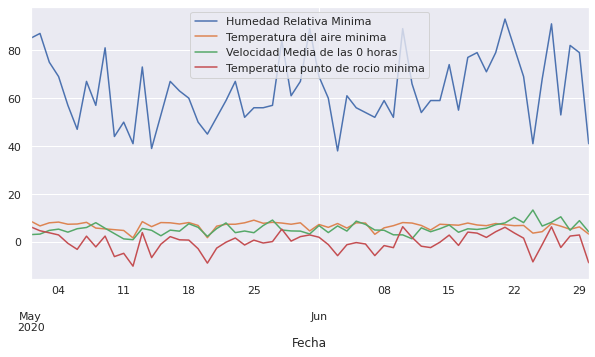

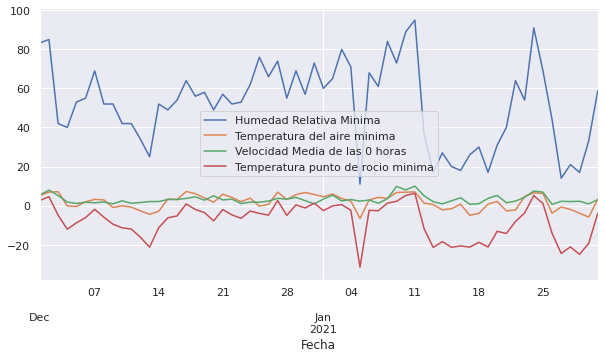

In [36]:
#@markdown  Datos normales y normales
anormal = data['2020-12-01':'2021-01-31']
normal = data['2020-05-01':'2020-06-30']
normal[['Humedad Relativa Minima','Temperatura del aire minima','Velocidad Media de las 0 horas','Temperatura punto de rocio minima']].plot(figsize = (10,5))
anormal[['Humedad Relativa Minima','Temperatura del aire minima','Velocidad Media de las 0 horas','Temperatura punto de rocio minima']].plot(figsize = (10,5))


#### **Preprocesamiento de datos**

In [37]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
data_train = data.loc[:'2019-09-01']
data_test = data.loc['2019-09-02':]
labels_train = labelEncoder.fit_transform(data_train['Tipo'])
labels_test = labelEncoder.fit_transform(data_test['Tipo'])

X_train_1 = data_train[data_train['Tipo']=='Sin Peligro'].iloc[:,:-1].values #normales
X_train_2 = data_train[data_train['Tipo']=='Helada Negra'].iloc[:,:-1].values #anormales

Y_test = labels_test
X_test_1 = data_test[data_test['Tipo']=='Sin Peligro'].iloc[:,:-1].values #normales
X_test_2 = data_test[data_test['Tipo']=='Helada Negra'].iloc[:,:-1].values #anormales heladas negras
X_test_3 = data_test[data_test['Tipo']=='Helada Blanca'].iloc[:,:-1].values #anormales heladas blancas

#### **Normalizar datos**

In [38]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

X_train_1_scale = min_max_scaler.fit_transform(X_train_1)

X_test_1_scale = min_max_scaler.fit_transform(X_test_1)
X_test_2_scale = min_max_scaler.fit_transform(X_test_2)
X_test_3_scale = min_max_scaler.fit_transform(X_test_3)

# **Creación del Autoencoder en Tensorflow/Keras**

In [39]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers  import Dense,Dropout,Input

np.random.seed(23)

dim = X_train_1_scale.shape[1]
entrada = Input(shape = (dim,))

#Encoder
encoder = Dense(32, activation = 'relu')(entrada)
encoder = Dense(16, activation = 'relu')(encoder)
encoder = Dense(2, activation = 'relu')(encoder)

decoder = Dense(64, activation = 'relu')(encoder)
decoder = Dense(32, activation = 'relu')(decoder)
decoder = Dense(8, activation ='sigmoid')(decoder)

autoencoder = Model(inputs = entrada, outputs = decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
_________________________________________________________________
dense_4 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264   

### **Optimización y entrenamiento**
Para medir la perdida, se utilizará el error absoluto medio

In [40]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
autoencoder.compile(optimizer=RMSprop(0.001), loss='mae')
history = autoencoder.fit(X_train_1_scale, X_train_1_scale, 
          epochs=25, 
          batch_size=32,
          validation_data=(X_test_1_scale, X_test_1_scale),
          shuffle=True)

Epoch 1/25
39/39 [==============================] - 1s 8ms/step - loss: 0.2257 - val_loss: 0.1647
Epoch 2/25
39/39 [==============================] - 0s 5ms/step - loss: 0.1153 - val_loss: 0.1515
Epoch 3/25
39/39 [==============================] - 0s 6ms/step - loss: 0.0908 - val_loss: 0.1529
Epoch 4/25
39/39 [==============================] - 0s 6ms/step - loss: 0.0898 - val_loss: 0.1502
Epoch 5/25
39/39 [==============================] - 0s 5ms/step - loss: 0.0887 - val_loss: 0.1523
Epoch 6/25
39/39 [==============================] - 0s 5ms/step - loss: 0.0874 - val_loss: 0.1484
Epoch 7/25
39/39 [==============================] - 0s 5ms/step - loss: 0.0861 - val_loss: 0.1487
Epoch 8/25
39/39 [==============================] - 0s 6ms/step - loss: 0.0840 - val_loss: 0.1462
Epoch 9/25
39/39 [==============================] - 0s 6ms/step - loss: 0.0806 - val_loss: 0.1401
Epoch 10/25
39/39 [==============================] - 0s 5ms/step - loss: 0.0761 - val_loss: 0.1374
Epoch 11/25
39/39 [

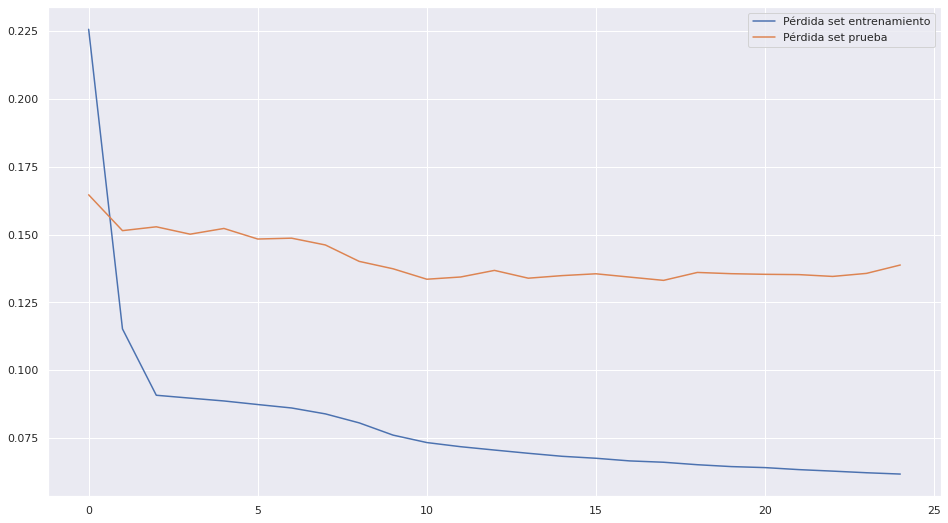

In [41]:
plt.plot(history.history["loss"], label="Pérdida set entrenamiento")
plt.plot(history.history["val_loss"], label="Pérdida set prueba")
plt.legend()

En esta gráfica, se va a evaluar qué tan bien reconstruye el modelo los datos de test. Donde la distancia entre las 2 curvas, es el equivalente al error de reconstrucción.

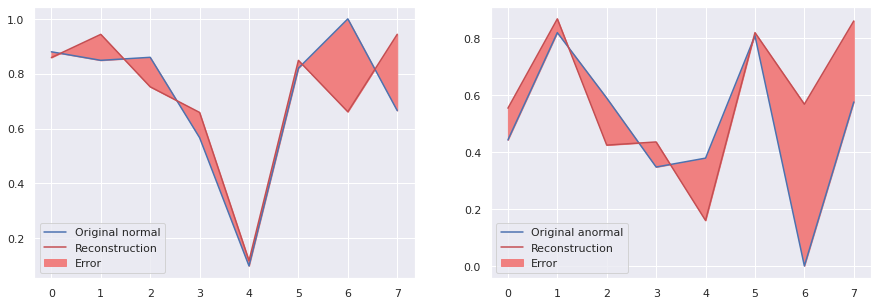

In [42]:
rec_normal = autoencoder(X_test_1_scale).numpy()
rec_anormal = autoencoder(X_test_2_scale).numpy()

dato = 10
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(X_test_1_scale[dato],'b')
plt.plot(rec_normal[dato],'r')
plt.fill_between(np.arange(8), rec_normal[dato], X_test_1_scale[dato], color='lightcoral')
plt.legend(labels=["Original normal", "Reconstruction", "Error"])
plt.subplot(1,2,2)
plt.plot(X_test_2_scale[dato],'b')
plt.plot(rec_anormal[dato],'r')
plt.fill_between(np.arange(8), rec_anormal[dato], X_test_2_scale[dato], color='lightcoral')
plt.legend(labels=["Original anormal", "Reconstruction", "Error"])

Mediante este gráfico, se busca observar cómo se distribuyen los errores según las predicciones de cada categoría. Los que se encuentran más a la izquierda, que son los errores más cercanos a cero se encuentran los datos normales. Los que se encuentran más a la izquierda, son datos anormales.

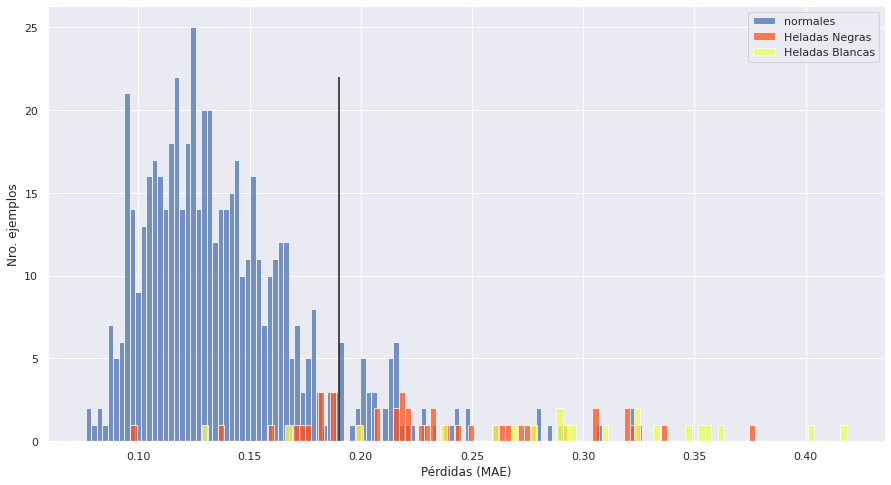

In [43]:
#@markdown **Histograma de errores** 
import tensorflow as tf

rec_1 = autoencoder.predict(X_test_1_scale)
rec_2 = autoencoder.predict(X_test_2_scale)
rec_3 = autoencoder.predict(X_test_3_scale)

loss_1 = tf.keras.losses.mae(rec_1, X_test_1_scale)
loss_2 = tf.keras.losses.mae(rec_2, X_test_2_scale)
loss_3 = tf.keras.losses.mae(rec_3, X_test_3_scale)

plt.figure(figsize=(15,8))
plt.hist(loss_1[None,:], bins=100, alpha=0.75, label='normales')
plt.hist(loss_2[None,:], bins=100, alpha=0.75, color='#ff521b', label='Heladas Negras')
plt.hist(loss_3[None,:], bins=100, alpha=0.75, color='#eefc57', label='Heladas Blancas')


plt.xlabel('Pérdidas (MAE)')
plt.ylabel('Nro. ejemplos')
plt.legend(loc='upper right')
plt.vlines(0.19,0,22,'k')

In [ ]:
#autoencoder.save('modelo.h5')
from tensorflow.keras.models import load_model
autoencoder = load_model('modelo.h5')

In [44]:
#@markdown # **Umbral**
umbral = np.mean(loss_1) + np.std(loss_1)
print("Umbral: ", umbral)

Umbral:  0.17680697685487617


In [45]:
# Calcular predicciones individuales
def predecir(modelo, datos, umbral):
  reconstrucciones = modelo(datos)
  perdida = tf.keras.losses.mae(reconstrucciones, datos)
  return tf.math.less(perdida, umbral)

def precision(prediccion, titulo):
  TP = np.count_nonzero(~prediccion)
  FN = np.count_nonzero(prediccion)
  sen = 100*(TP/(TP+FN))

  print(titulo + ': {:.1f}%'.format(sen))

def recall(prediccion, titulo):
  TN = np.count_nonzero(prediccion)
  FP = np.count_nonzero(~prediccion)
  esp = 100*(TN/(TN+FP))

  print(titulo + ': {:.1f}%'.format(esp))
  return esp

- **Verdaderos positivos (TP):** anormales que han sido correctamente clasificados como anormales
- **Falsos negativos (FN):** anormales que han sido clasificados erróneamente como normales
- **Verdaderos negativos (TN):** normales que han sido correctamente clasificados como normales
- **Falsos positivos (FP):** normales que han sido clasificados erróneamente como anormales

- **Precision:** ($\frac{TP}{TP+ FP}$)  mide la proporción de anormales que fueron detectados correctamente como anormales. Un recall del 100% detectará todos los tipos de heladas de radiación.


- **Recall:** ($\frac{TP}{TP+ FN}$)  mide la proporción de anormales que fueron detectados correctamente como anormales. Un recall del 100% detectará todos los tipos de heladas de radiación.

In [46]:
# Predicciones
pred_1 = predecir(autoencoder, X_test_1_scale, umbral)
pred_2 = predecir(autoencoder, X_test_2_scale, umbral)
pred_3 = predecir(autoencoder, X_test_3_scale, umbral)


# Pred1: especificidad
normales = recall(pred_1,'(Condiciones Normales, normales)')
# Pred 2 a 5: sensitividad
anormales1 = precision(pred_2,'(Heladas Negras, anormales)')

anormales2 = precision(pred_3,'(Heladas blancas, anormales)')


(Condiciones Normales, normales): 87.1%
(Heladas Negras, anormales): 88.6%
(Heladas blancas, anormales): 90.5%


In [47]:
predicciones = autoencoder.predict(X_test_1_scale)
autoencoder.evaluate(predicciones,X_test_1_scale)

18/18 [==============================] - 0s 3ms/step - loss: 0.1419


0.14192844927310944

En esta segunda implementación de detección de anomalías, se hizo el procesamiento de datos con OneHotEncoder a la columna nubosidad.


#### **Segundo modelo**

In [50]:
#@markdown #### **Preprocesamiento de datos**
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelEncoder = LabelEncoder()

data2 = data.copy()
labels = labelEncoder.fit_transform(data2['Tipo'])
transformer = ColumnTransformer(
    transformers=[
        ("Nubosidad",        # Un nombre de la transformación
         OneHotEncoder(categories='auto'), # La clase a la que transformar
         [6]        # Las columnas a transformar.
         )
    ], remainder='passthrough'
)

data2 = transformer.fit_transform(data2)
data2 = pd.DataFrame(data2)
data2.index = data.index
columns = np.concatenate([['Nivel1', 'Nivel2', 'Nivel3', 'Nivel4'],data.columns.values])
columns = np.delete(columns,10)
data2.columns = columns

train_set = data2.loc[:'2019-08-31']
test_set = data2.loc['2019-09-01':]

X_train1 = train_set[train_set['Tipo']=='Sin Peligro'].iloc[:,:-1].values
X_test1 = test_set[test_set['Tipo'] == 'Sin Peligro'].iloc[:,:-1].values
X_test2 = test_set[test_set['Tipo'] == 'Helada Negra'].iloc[:,:-1].values
X_test3 = test_set[test_set['Tipo'] == 'Helada Blanca'].iloc[:,:-1].values


In [51]:
#@markdown #### **Normalización**

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

X_train_1_scale = min_max_scaler.fit_transform(X_train1)

X_test_1_scale = min_max_scaler.fit_transform(X_test1)
X_test_2_scale = min_max_scaler.fit_transform(X_test2)
X_test_3_scale = min_max_scaler.fit_transform(X_test3)

In [52]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers  import Dense,Dropout,Input

np.random.seed(23)

dim = X_train_1_scale.shape[1]
entrada = Input(shape = (dim,))

#Encoder
encoder = Dense(64, activation = 'relu', kernel_initializer='uniform')(entrada)
encoder = Dense(32, activation = 'relu')(encoder)
encoder = Dense(16, activation = 'relu')(encoder)
encoder = Dense(4, activation = 'relu')(encoder)


decoder = Dense(8, activation = 'relu')(encoder)
decoder = Dense(10, activation = 'relu')(decoder)
decoder = Dense(12, activation = 'relu')(decoder)
decoder = Dense(11, activation ='sigmoid')(decoder)

autoencoder = Model(inputs = entrada, outputs = decoder)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_12 (Dense)             (None, 10)                90  

In [53]:
#@markdown ### **Entrenamiento**

from tensorflow.keras.optimizers import Adam,SGD,RMSprop
autoencoder.compile(optimizer=RMSprop(0.0001), loss='mae')
history = autoencoder.fit(X_train_1_scale, X_train_1_scale, 
          epochs=50, 
          batch_size=32,
          validation_data=(X_test_1_scale, X_test_1_scale),
          shuffle=True)

Epoch 1/50
39/39 [==============================] - 1s 10ms/step - loss: 0.3690 - val_loss: 0.3373
Epoch 2/50
39/39 [==============================] - 0s 6ms/step - loss: 0.3639 - val_loss: 0.3319
Epoch 3/50
39/39 [==============================] - 0s 5ms/step - loss: 0.3571 - val_loss: 0.3247
Epoch 4/50
39/39 [==============================] - 0s 6ms/step - loss: 0.3481 - val_loss: 0.3155
Epoch 5/50
39/39 [==============================] - 0s 5ms/step - loss: 0.3368 - val_loss: 0.3045
Epoch 6/50
39/39 [==============================] - 0s 5ms/step - loss: 0.3241 - val_loss: 0.2931
Epoch 7/50
39/39 [==============================] - 0s 7ms/step - loss: 0.3118 - val_loss: 0.2824
Epoch 8/50
39/39 [==============================] - 0s 6ms/step - loss: 0.3008 - val_loss: 0.2726
Epoch 9/50
39/39 [==============================] - 0s 5ms/step - loss: 0.2902 - val_loss: 0.2628
Epoch 10/50
39/39 [==============================] - 0s 6ms/step - loss: 0.2793 - val_loss: 0.2524
Epoch 11/50
39/39 

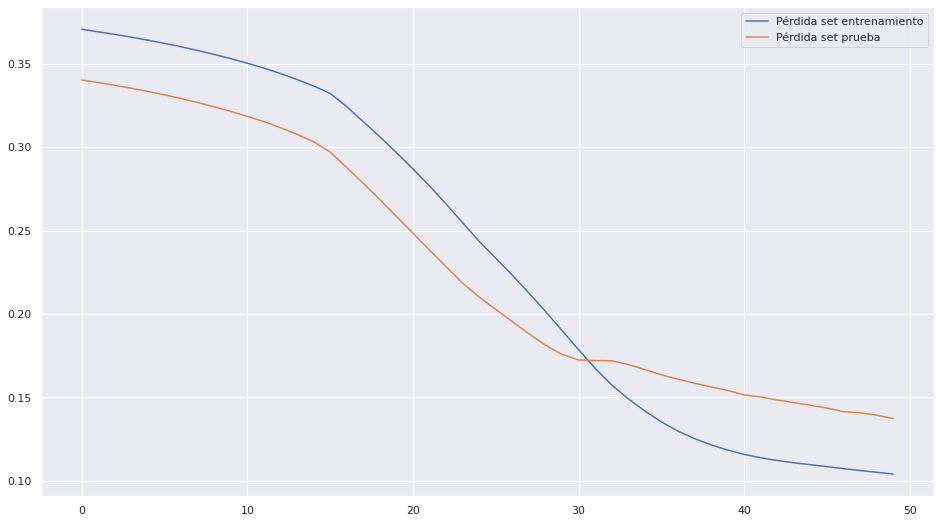

In [ ]:
#@markdown ### **Resultados**

plt.plot(history.history["loss"], label="Pérdida set entrenamiento")
plt.plot(history.history["val_loss"], label="Pérdida set prueba")
plt.legend()

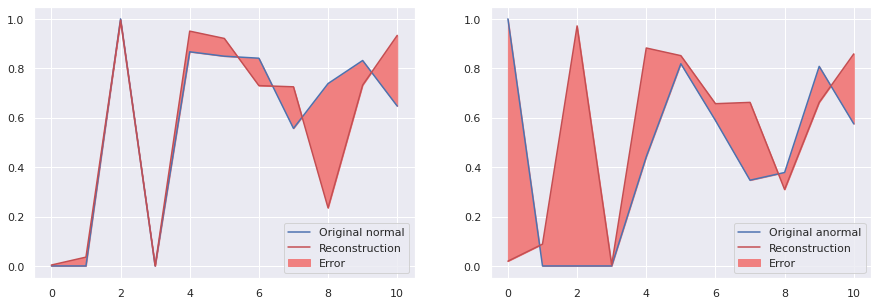

In [ ]:
#@markdown # **Reconstrucción de los datos**
rec_normal = autoencoder(X_test_1_scale).numpy()
rec_anormal = autoencoder(X_test_2_scale).numpy()

dato = 10
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(X_test_1_scale[dato],'b')
plt.plot(rec_normal[dato],'r')
plt.fill_between(np.arange(11), rec_normal[dato], X_test_1_scale[dato], color='lightcoral')
plt.legend(labels=["Original normal", "Reconstruction", "Error"])
plt.subplot(1,2,2)
plt.plot(X_test_2_scale[dato],'b')
plt.plot(rec_anormal[dato],'r')
plt.fill_between(np.arange(11), rec_anormal[dato], X_test_2_scale[dato], color='lightcoral')
plt.legend(labels=["Original anormal", "Reconstruction", "Error"])

In [ ]:
umbral = np.mean(loss_1) + np.std(loss_1)
print("Umbral: ", umbral)

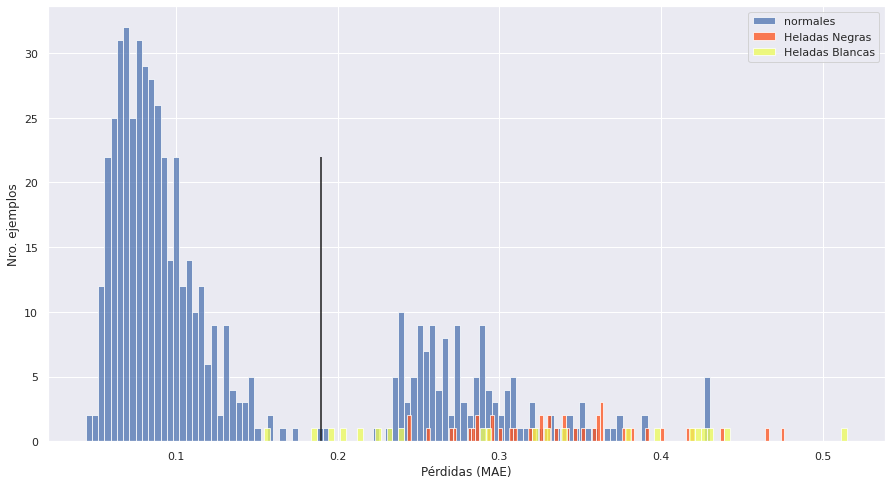

In [ ]:
#@markdown ### **Histograma de Errores**

import tensorflow as tf

rec_1 = autoencoder.predict(X_test_1_scale)
rec_2 = autoencoder.predict(X_test_2_scale)
rec_3 = autoencoder.predict(X_test_3_scale)

loss_1 = tf.keras.losses.mae(rec_1, X_test_1_scale)
loss_2 = tf.keras.losses.mae(rec_2, X_test_2_scale)
loss_3 = tf.keras.losses.mae(rec_3, X_test_3_scale)

plt.figure(figsize=(15,8))
plt.hist(loss_1[None,:], bins=100, alpha=0.75, label='normales')
plt.hist(loss_2[None,:], bins=100, alpha=0.75, color='#ff521b', label='Heladas Negras')
plt.hist(loss_3[None,:], bins=100, alpha=0.75, color='#eefc57', label='Heladas Blancas')


plt.xlabel('Pérdidas (MAE)')
plt.ylabel('Nro. ejemplos')
plt.legend(loc='upper right')
plt.vlines(0.19,0,22,'k')

In [ ]:
#@markdown # **Predicción**
pred_1 = predecir(autoencoder, X_test_1_scale, umbral)
pred_2 = predecir(autoencoder, X_test_2_scale, umbral)
pred_3 = predecir(autoencoder, X_test_3_scale, umbral)


# Pred1: especificidad
normales = recall(pred_1,'(Condiciones Normales, normales)')
# Pred 2 a 5: sensitividad
anormales1 = precision(pred_2,'(Heladas Negras, anormales)')

anormales2 = precision(pred_3,'(Heladas blancas, anormales)')

(Condiciones Normales, normales): 75.1%
(Heladas Negras, anormales): 100.0%
(Heladas blancas, anormales): 71.4%


# **9. Conclusiones**




> - A pesar de que los resultados obtenidos no fueron
los más precisos, el análisis del problema si cuenta
con un enfoque acertado, las heladas son una
problemática que afecta a una población y con la
aplicación de inteligencia artificial podemos buscar
una solución.

> - El error en los resultados surge principalmente por
la carencia de datos, aunque se encontraron una
cantidad considerable en la plataforma del IDEAM,
estos carecían en su mayoría de calidad por lo
tanto en el análisis y procesamiento de datos se
descartaron gran parte de ellos.

 > - La calidad de los datos no fue la más optima, debido a que en muchos casos se confundieron anomalías con datos normales. Esto se debe a que en Berlín es común encontrarse temperaturas por debajo de cero, sin embargo, no siempre son heladas dadas estas condiciones, además de que no se encuentra una gran cantidad de datos.